In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import display

# Load the CSV file
bear_data = pd.read_csv('bear_data.csv')
shark_data = pd.read_csv('shark_data.csv')

In [ ]:
                                                            Bear Data

In [4]:
# Check the column names in shark_data
print(shark_data.columns)

# Check the column names in bear_data
print(bear_data.columns)


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')
Index(['Date', 'Location', 'Details', 'Bear', 'Latitude', 'Longitude', 'Name',
       'Age', 'Gender'],
      dtype='object')


In [20]:
# Load the bear data
bear_data = pd.read_csv('bear_data.csv')

# Initialize the map centered around a central location (average of latitudes and longitudes)
map_center = [bear_data['Latitude'].mean(), bear_data['Longitude'].mean()]
incident_map = folium.Map(location=map_center, zoom_start=5, control_scale=True)

# Create a dictionary to hold LayerGroups for each bear species
layers = {}

# Define a function to create markers with bold titles in the popup
def create_marker(row, layer_group):
    popup_message = (
        f"<strong>Bear Species:</strong> {row['Bear']}<br>"
        f"<strong>Location:</strong> {row['Location']}<br>"
        f"<strong>Date:</strong> {row['Date']}<br>"
        f"<strong>Details:</strong> {row['Details']}<br>"
        f"<strong>Age:</strong> {row['Age']}<br>"
        f"<strong>Gender:</strong> {row['Gender']}"
    )
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_message, max_width=300),
        icon=folium.Icon(color='green', icon='info-sign')
    )
    marker.add_to(layer_group)

# Iterate over each unique bear species to create separate layers
for species in bear_data['Bear'].unique():
    layer = folium.FeatureGroup(name=f"{species} Bear Attacks")
    filtered_data = bear_data[bear_data['Bear'] == species]
    filtered_data.apply(create_marker, axis=1, layer_group=layer)
    layers[species] = layer
    layer.add_to(incident_map)

# Add the heatmap layer
heat_data = [[row['Latitude'], row['Longitude']] for _, row in bear_data.iterrows()]
heatmap_layer = folium.FeatureGroup(name='Heat Map')
HeatMap(heat_data).add_to(heatmap_layer)
heatmap_layer.add_to(incident_map)

# Style the map title with a modern look
map_title = folium.map.CustomPane('title', z_index=650)
title_html = '''
     <div style="position: fixed; 
                 bottom: 20px; left: 50%; transform: translateX(-50%);
                 background-color: rgba(0, 0, 0, 0.7); 
                 color: white; font-size: 20px; font-family: 'Arial', sans-serif;
                 z-index: 9999; padding: 10px 20px; border-radius: 10px;
                 box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.4);">
         <strong>Bear Attacks in the US</strong>
     </div>
     '''
incident_map.get_root().html.add_child(folium.Element(title_html))

# Add a LayerControl to switch between different bear species layers
folium.LayerControl(collapsed=False).add_to(incident_map)

# Display the map in the Jupyter Notebook
display(incident_map)


In [4]:
# Check for any potential issues in the data (e.g., missing or invalid lat/lon)
print(bear_data[['Latitude', 'Longitude']].describe())

# Ensure the map is centered correctly with a moderate zoom level
map_center = [bear_data['Latitude'].mean(), bear_data['Longitude'].mean()]
incident_map = folium.Map(location=map_center, zoom_start=4, tiles='OpenStreetMap', control_scale=True)

# Create a dictionary to hold LayerGroups for each bear species
layers = {}

# Define a function to create markers with tooltips
def create_marker(row, layer_group):
    popup_message = (
        f"<strong>Bear Species:</strong> {row['Bear']}<br>"
        f"<strong>Location:</strong> {row['Location']}<br>"
        f"<strong>Date:</strong> {row['Date']}<br>"
        f"<strong>Details:</strong> {row['Details']}<br>"
        f"<strong>Age:</strong> {row['Age']}<br>"
        f"<strong>Gender:</strong> {row['Gender']}"
    )
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=row['Bear'],
        popup=folium.Popup(popup_message, max_width=300)
    )
    marker.add_to(layer_group)

# Iterate over each unique bear species to create separate layers
for species in bear_data['Bear'].unique():
    layer = folium.FeatureGroup(name=f"{species} Bear Attacks")
    filtered_data = bear_data[bear_data['Bear'] == species]
    filtered_data.apply(create_marker, axis=1, layer_group=layer)
    layers[species] = layer
    layer.add_to(incident_map)

# Add a simple heatmap layer
heat_data = [[row['Latitude'], row['Longitude']] for _, row in bear_data.iterrows()]
heatmap_layer = folium.FeatureGroup(name='Heat Map')
HeatMap(heat_data, radius=15, blur=10).add_to(heatmap_layer)
heatmap_layer.add_to(incident_map)

# Add a mini map for better navigation
mini_map = MiniMap(toggle_display=True, position='bottomleft')
incident_map.add_child(mini_map)

# Add full-screen control
Fullscreen(position='topright').add_to(incident_map)

# Add a LayerControl to switch between different bear species layers
folium.LayerControl(collapsed=False).add_to(incident_map)

# Display the map in the Jupyter Notebook
display(incident_map)


         Latitude   Longitude
count  156.000000  156.000000
mean    51.014942 -113.889579
std      8.825507   22.993165
min     28.647838 -163.011250
25%     45.250210 -124.686183
50%     49.814079 -113.780475
75%     58.416670 -105.525439
max     69.742800  -66.825422


In [ ]:
                                                              Shark Data

In [13]:
# Load the CSV file
shark_data = pd.read_csv('shark_data.csv')

In [14]:
# Display the first few rows of the DataFrame to inspect the data
print(shark_data.head())

  case_number         date    year        type country     area  \
0  2019.08.27  27-Aug-2019  2019.0    Provoked     USA  Florida   
1  2019.08.21  21-Aug-2019  2019.0  Unprovoked     USA  Florida   
2  2019.08.20  20-Aug-2019  2019.0  Unprovoked     USA   Hawaii   
3  2019.08.16  16-Aug-2019  2019.0  Unprovoked     USA  Florida   
4  2019.08.11  11-Aug-2019  2019.0  Unprovoked     USA   Hawaii   

                                          location  activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 name sex  ...           species  \
0        Donald Walsh   M  ...        6.5' shark   
1  Christian Mariani    M  ...               NaN   
2              female   F  ...               NaN   
3   

In [15]:
print(shark_data.columns)


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')


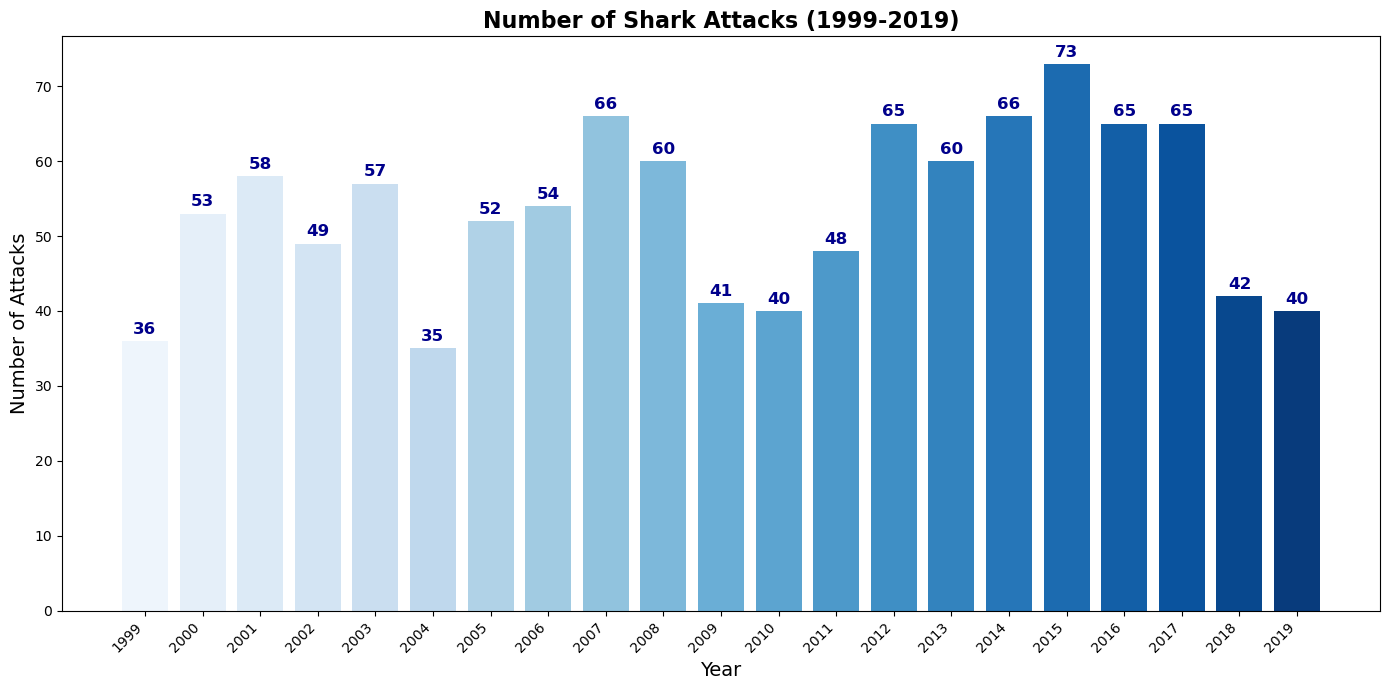

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'year' column is numeric
shark_data['year'] = pd.to_numeric(shark_data['year'], errors='coerce')

# Filter the data for the years 1999 to 2019
filtered_data = shark_data[(shark_data['year'] >= 1999) & (shark_data['year'] <= 2019)]

# Group by year and count incidents
attacks_by_year = filtered_data.groupby('year').size()

# Plotting with enhancements
plt.figure(figsize=(14, 7))

# Use an ocean-themed color palette
ocean_palette = sns.color_palette("Blues", len(attacks_by_year))

# Create the bar plot
bars = plt.bar(attacks_by_year.index.astype(int), attacks_by_year.values, color=ocean_palette)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Number of Shark Attacks (1999-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)

# Remove the .0 from the year labels
plt.xticks(ticks=attacks_by_year.index, labels=attacks_by_year.index.astype(int))

# Add annotations to show the exact number of attacks on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points", 
                 ha='center', va='bottom', fontsize=12, color='darkblue', fontweight='bold')

# Adjust the plot layout to make sure everything fits
plt.tight_layout()

# Show plot
plt.show()


In [3]:
# Seed for reproducibility
np.random.seed(42)

# Generate sample data
years = np.arange(1900, 2020)
countries = ['USA', 'Australia', 'South Africa', 'Brazil', 'Mexico', 'Japan']
types = ['Unprovoked', 'Provoked']
shark_types = ['Great White', 'Tiger', 'Bull', 'Hammerhead', 'Reef', 'Mako']

# Generate a random dataset
data = {
    'case_number': [],
    'date': [],
    'year': [],
    'type': [],
    'country': [],
    'shark_type': []
}

for year in years:
    for _ in range(np.random.randint(1, 10)):  # Random number of cases per year
        data['case_number'].append(str(np.random.randint(10000)))
        data['date'].append(f"{year}-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}")
        data['year'].append(year)
        data['type'].append(np.random.choice(types))
        data['country'].append(np.random.choice(countries))
        data['shark_type'].append(np.random.choice(shark_types))

shark_data = pd.DataFrame(data)

# Filter the dataset for USA only
shark_data_usa = shark_data[shark_data['country'] == 'USA']

# Count the number of attacks per year and shark type in the USA
attacks_per_year_shark_type_usa = shark_data_usa.groupby(['year', 'shark_type']).size().reset_index(name='counts')

# Pivot the data for the area plot
pivot_table = attacks_per_year_shark_type_usa.pivot(index='year', columns='shark_type', values='counts').fillna(0)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the stacked area plot with an ocean-themed color palette
colors = ['#004c6d', '#007098', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef']
pivot_table.plot(kind='area', stacked=True, figsize=(15, 8), color=colors)

# Customize the appearance of the plot
plt.title('Number of Shark Attacks by Year and Shark Type in the USA (1900-2019)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(ticks=np.arange(1900, 2020, 10), rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Shark Type', fontsize=12, title_fontsize='13')
plt.grid(True)

# Ensure y-axis shows whole numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined